![title](UCN.png)

 #  <font color=blue> Vehicle Routing Problem - VRP | Cplex | V[1]. </font>

<div class="alert alert-info"> </h4> Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Escuela de Ingeniería - Campus Coquimbo | Curso - Cadena de Suministros.                                                                          
© Sergio Correa Santis, Ingenerio Industrial UCN, Master of International Business UQ, Master Engeneering of Supply Chain and Logistics, MIT ZLC-Global Scale.                               Contacto: sergio.correa@ucn.cl o sergio.correa.santis@gmail.com
</h4> </div>

## **Problema**


El problema de la ruta de vehículos, es un problema de optimización combinatoria y de programación de entero qué pregunta "¿Cuál es el conjunto óptimo de rutas para una flota de vehículos que debe satisfacer las demandas de un conjunto dado de clientes?". Es una generalización del conocido Problema del Viajante (TSP). La primera definición aparece en una artículo de George Dantzig y John Ramser en 1959, en donde plantea una aproximación algorítmica y fue aplicado para entregas de gasolina. El problema, requiere la entrega de cierto producto, almacenado en un único local, a los clientes los cuales poseen cierta demanda; el objetivo fundamental es minimizar el coste total de las rutas trazadas. En 1964, Clarke y Wright mejoraron la aproximación de Dantzig y Ramser utilizando una aproximación “greedy” conocido como algoritmo de ahorros.

Determinar la solución óptima es un problema NP-hard de optimización combinatoria. Las implementaciones más utilizadas para resolver el problema se basan en heurísticas debido a que para grandes instancias del problema, que como sucede en ejemplos reales, producen buenos resultados. El VRP tiene muchas aplicaciones obvias en industrias.

<img src="VRP-3.png" width="700" height="700" />

Fuente: [Wikipedia | Vehicule Routing Problem](https://es.wikipedia.org/wiki/Problema_de_enrutamiento_de_veh%C3%ADculos)

**El VRP se encarga del servicio de una compañía de entrega, un depósito y un conjunto dado de vehículos, los cuales se mueven en una red de carretera dada, para entregar los productos a un conjunto de clientes. Determina un conjunto de rutas, S, (una ruta para cada vehículo que inicia y termina en el depósito) tal que todas las demandas de los clientes son satisfechas y el coste de la transportación total está minimizado. Esto cuesto puede ser monetario, distancia, tiempo, etc.**

La red de carretera puede ser descrita utilizando un grafo donde los arcos son las carreteras y los vértices representan la localización de los clientes y del depósito. Los arcos pueden ser dirigidos o no, debido a costes diferentes en cada dirección o alguna variante del problema. Cada arco tiene un coste asociado.

La función objetiva de un VRP puede ser muy diferente dependiendo de la aplicación particular del resultado, unos de los objetivos más comunes son:

- Minimizar el coste total del transporte basado en la distancia total recorrida con los vehículos utilizados.
- Minimizar el número de vehículos utilizados satisfacer a todos los clientes.
- Minimizar la variación entre el tiempo de viaje y la carga del vehículo.
- Minimizar las penalizaciones por servicio de baja calidad.

### **Formulación Matemática del Problema**

- cliente (C): Conjunto de **clientes**
- nodos: Conjunto de **nodos**, donde 0 representa del DC |$\;N= \{0\} \cup C $
- arcos: conjunto de todos los **arcos** entre cada nodo |$\;A= \{(i,j) \in N^2 : i \neq j\}$
- $c_{ij}$ = Costo o distancia entre el nodo i y el nodo j
- $q_i$= carga de cada paquete en Cliente.
- Q: Capacidad de los vehiculos.


#### **variables de decisión**

- $x_{i,j}$ igual a 1 cuando se decide viajar en el arco $(i,j) \in A$; cero de lo contrario
- $u_i$ capacidad  $i \in C$


$Min \; Z= \; \displaystyle\sum_{i\;\in\;A}^{}\sum_{j\;\in\;A}^{} x_{ij}c_{ij}$

$\displaystyle\sum_{i\;\in\; Cliente}^{}x_{ij}= 1$     $\; \; \forall \;j \; \in \; Nodos$

$\displaystyle\sum_{j\;\in\; Cliente}^{}x_{ij}= 1$     $\; \; \forall \;i \; \in \; Nodos$

$\displaystyle\sum_{i\;\in\; Cliente}^{}x_{i0}= K$ 

$\displaystyle\sum_{j\;\in\; Cliente}^{}x_{0j}= K$

$\displaystyle\sum_{i\; \in\;S}^{}\sum_{j\in\;S}^{} \geq r(s)$  $\; \forall \;S \subseteq \; C   \setminus \{0\},S \neq \phi$

Esta última restricción sirve tanto como una restricción de capacidad y de eliminación de Sub Tour. Sin embargo, con está formulación el número de restricciones crece en forma exponencial con el número de nodos. Hay dos formas de resolver este problema: El primero es el utilizar el algoritmo de planos cortantes, la cual no veremos ya que es muy avanzada para este tutorial. La segunda es la formulación MTZ, que consiste en introducir una nueva variable $u=(u_1,....u_n)$ de acumulación.

$Si \; x_{ij}=1  \Rightarrow u_{i}+q_{j}=u_{j}$ 
$ \; \; i,j \in A: i\neq0, j\neq0 $

$ q_i \leq u_i \leq Q \; \; i \in N$


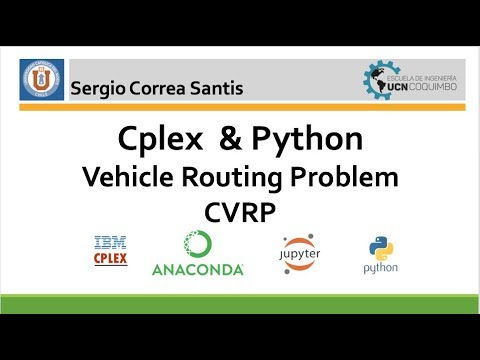

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('eMsqsmftWOQ')

## Creación de los Datos

In [2]:
n=10 # Clientes
clientes=[x for x in range(1,n+1)]

nodos=[0]+clientes
Q=15

import numpy as np
rnd=np.random
rnd.seed(0)

q={i:rnd.randint(1,10) for i in clientes}

In [3]:
# Crear coordenadas 
rnd.seed(0)
loc_x=rnd.rand(len(nodos))*200
loc_y=rnd.rand(len(nodos))*100

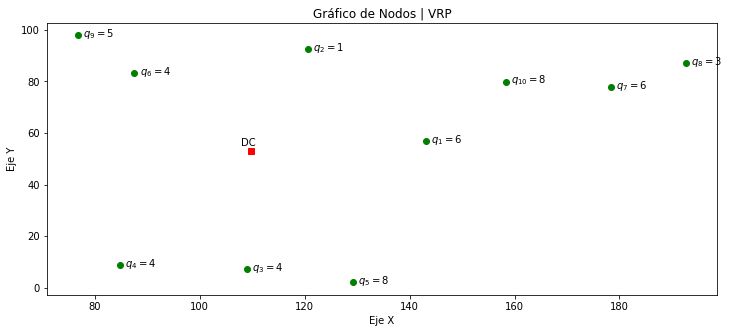

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.scatter(loc_x,loc_y,color="green")

for i in clientes:
    plt.annotate('$q_{%d}=%d$'%(i,q[i]),(loc_x[i]+1,loc_y[i]-0.5))
    
plt.plot(loc_x[0],loc_y[0],color='red',marker='s')
plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))

plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Gráfico de Nodos | VRP")

plt.show()

### Creando las estructuras de datos

In [5]:

arcos={(i,j) for i in nodos for j in nodos if i!=j}

In [6]:
distancia={(i,j):np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j]) 
           for i in nodos for j in nodos if i!=j}

## Creación y Optimización - CVRP

In [7]:
from docplex.mp.model import Model
mdl=Model('CVRP')

#### Creando las variables de decisión

In [8]:
x=mdl.binary_var_dict(arcos,name='x')
u=mdl.continuous_var_dict(nodos,ub=Q,name='u')

##### <font color=green> Función Objetivo </font>
$Min \; Z= \; \displaystyle\sum_{i\;\in\;A}^{}\sum_{j\;\in\;A}^{} x_{ij}c_{ij}$

In [9]:
mdl.minimize(mdl.sum(distancia[i,j]*x[i,j] for i,j in arcos))

##### <font color=green> Restricciones </font>
$\displaystyle\sum_{i\;\in\; Clientes}^{}x_{ij}= 1$     $\; \; \forall \;j \; \in \; Nodos$

$\displaystyle\sum_{j\;\in\; Clientes}^{}x_{ij}= 1$     $\; \; \forall \;i \; \in \; Nodos$

$Si \; x_{ij}=1  \Rightarrow u_{i}+q_{j}=u_{j}$ 
$ \; \; i,j \in A: i\neq0, j\neq0 $

$ q_i \leq u_i \leq Q \; \; i \in N$

In [10]:
mdl.add_constraints(mdl.sum(x[i,j] for j in nodos if i!=j)==1 for i in clientes)
mdl.add_constraints(mdl.sum(x[i,j] for i in nodos if i!=j)==1 for j in clientes)

mdl.add_indicator_constraints(mdl.indicator_constraint(x[i,j],u[i]+q[j]==u[j])
                                    for i,j in arcos if i!=0 and j!= 0)

mdl.add_constraints(u[i]>=q[i] for i in clientes)
print("")

In [11]:
mdl.parameters.timelimit=120
solucion=mdl.solve(log_output=True)

CPXPARAM_TimeLimit                               120
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201703173
Tried aggregator 2 times.
MIP Presolve eliminated 10 rows and 3 columns.
MIP Presolve modified 44 coefficients.
Aggregator did 44 substitutions.
Reduced MIP has 64 rows, 162 columns, and 328 nonzeros.
Reduced MIP has 108 binaries, 0 generals, 0 SOSs, and 88 indicators.
Presolve time = 0.02 sec. (0.35 ticks)
Found incumbent of value 1074.773652 after 0.03 sec. (0.48 ticks)
Probing time = 0.00 sec. (0.32 ticks)
Tried aggregator 1 time.
Reduced MIP has 64 rows, 162 columns, and 328 nonzeros.
Reduced MIP has 108 binaries, 0 generals, 0 SOSs, and 88 indicators.
Presolve time = 0.01 sec. (0.23 ticks)
Probing time = 0.00 sec. (0.30 ticks)
Clique table members: 64.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0

In [12]:
mdl.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [13]:
solucion.display()

solution for: CVRP
objective: 635.109
x_(6, 9) = 1
x_(4, 0) = 1
x_(0, 1) = 1
x_(7, 8) = 1
x_(9, 4) = 1
x_(0, 5) = 1
x_(0, 2) = 1
x_(3, 0) = 1
x_(8, 0) = 1
x_(10, 0) = 1
x_(5, 3) = 1
x_(0, 6) = 1
x_(1, 7) = 1
x_(2, 10) = 1
u_1 = 6.000
u_2 = 7.000
u_3 = 15.000
u_4 = 13.000
u_5 = 11.000
u_6 = 4.000
u_7 = 12.000
u_8 = 15.000
u_9 = 9.000
u_10 = 15.000


In [14]:
arcos_activos=[k for k in arcos if x[k].solution_value>0.9]
arcos_activos

[(6, 9),
 (4, 0),
 (0, 1),
 (7, 8),
 (9, 4),
 (0, 5),
 (0, 2),
 (3, 0),
 (8, 0),
 (10, 0),
 (5, 3),
 (0, 6),
 (1, 7),
 (2, 10)]

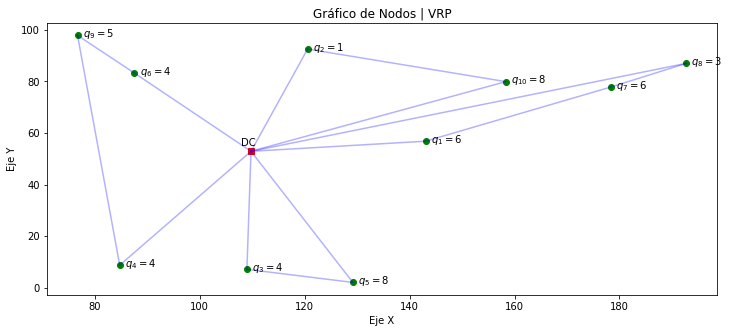

In [15]:
plt.figure(figsize=(12,5))
plt.scatter(loc_x,loc_y,color="green")

for i in clientes:
    plt.annotate('$q_{%d}=%d$'%(i,q[i]),(loc_x[i]+1,loc_y[i]-0.5))
    
plt.plot(loc_x[0],loc_y[0],color='red',marker='s')
plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))

for i,j in arcos_activos:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="blue",alpha=0.3)

plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Gráfico de Nodos | VRP")

plt.show()

<div class="alert alert-info"> </h4> Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Escuela de Ingeniería - Campus Coquimbo | Curso - Cadena de Suministros.                                                                          
© Sergio Correa Santis, Ingenerio Industrial UCN, Master of International Business UQ, Master Engeneering of Supply Chain and Logistics, MIT ZLC-Global Scale.                               Contacto: sergio.correa@ucn.cl o sergio.correa.santis@gmail.com
</h4> </div>